# Adaptive Local Histogram Equalization
### 여기서는 MATLAB에 adapthisteq에 해당하는 것을 구현해 본다
### 나머지 Histogram Processing 과정 (Sliding, Stretching, Shrink 등)은 직접 구현해 보도록 하자
### 어려울 수 있지만 최대한 해보는 것을 목표로 한다
#### Histogram을 다루는 것은 사실 이렇게 중요하진 않다
#### 그래도 언젠가는 다루고, 코딩적인 Skill로도 도움이 되기 때문에 열심히 해보는 것을 권장

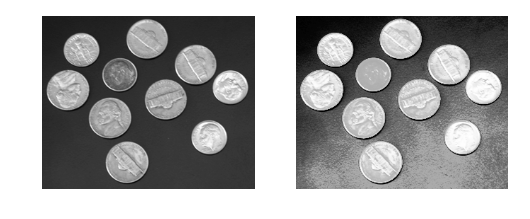

In [3]:
from PIL import Image
import pylab as plt
import numpy as np

img = np.array(Image.open('D:\\ipy\\coins.png').convert('L'))

imhist, bins = plt.histogram(img.flatten(), 256, normed=True)
cdf = imhist.cumsum()
cdf = 255 * cdf / cdf[-1]

im2 = np.interp(img.flatten(), bins[:-1], cdf)
img_heq = im2.reshape(img.shape)

plt.figure(1)
plt.subplot(1,2,1)
plt.gray()
plt.axis('off')
plt.imshow(img)

plt.subplot(1,2,2)
plt.gray()
plt.axis('off')
plt.imshow(img_heq)

plt.show()

### 위의 코드는 일반적인 Histogram Equalization이다
### Adaptive Histogram Equalization은 간단한 코드 구현이 아니기 때문에 Library를 사용한다
### skimage의 exposure library를 사용한다
## 여기서 기존 histogram eq.도 지원하고 adaptive hist eq도 지원한다
## 결과는 아래와 같다

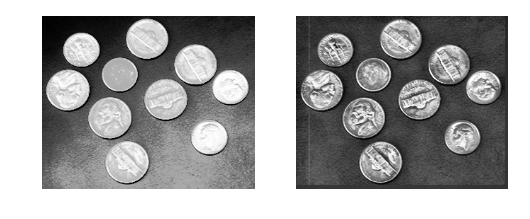

In [5]:
from skimage import exposure

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

plt.figure(1)
plt.subplot(1,2,1)
plt.gray()
plt.axis('off')
plt.imshow(img_eq)

plt.subplot(1,2,2)
plt.gray()
plt.axis('off')
plt.imshow(img_adapteq)

plt.show()

## 나머지 Histogram Algorithm은 어렵지 않기때문에 Library없이 구현하는 것을 목표로 한다